In [723]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline 

In [724]:
rentals_bike = pd.read_csv('day.csv')

In [725]:
rentals_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [726]:
rentals_bike.shape

(730, 16)

In [727]:

rentals_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

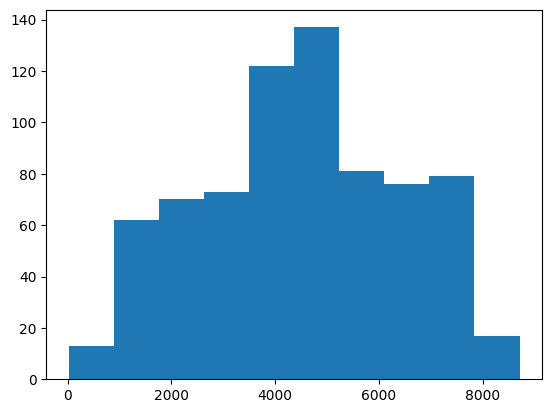

In [728]:
plt.hist(rentals_bike['cnt'])
plt.show()

In [729]:
rentals_bike.dtypes


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [730]:
rentals_bike.drop(columns=['dteday'], inplace=True)

In [731]:
correlation = rentals_bike.corr()

In [732]:
rentals_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


In [733]:
rentals_bike['temp'].unique()

array([14.110847 , 14.902598 ,  8.050924 ,  8.2      ,  9.305237 ,
        8.378268 ,  8.057402 ,  6.765    ,  5.671653 ,  6.184153 ,
        6.932731 ,  7.081807 ,  6.59567  ,  9.566653 ,  9.498347 ,
        7.209153 ,  8.883347 , 11.979134 , 10.728347 ,  7.2775   ,
        2.4243464,  3.9573897,  3.9930433,  9.162598 ,  8.9175   ,
        7.995    ,  8.342598 ,  8.877402 ,  7.414153 ,  7.879134 ,
       10.66     ,  7.665237 ,  8.663464 , 11.719153 , 11.138347 ,
        9.054153 ,  5.526103 ,  5.918268 ,  7.752731 ,  9.1225   ,
       12.977402 , 17.015    , 10.909567 , 13.048701 , 17.869153 ,
       21.388347 , 16.365847 , 11.693897 , 12.436653 ,  7.471102 ,
        9.091299 , 12.121732 , 14.938268 , 11.5825   , 14.082598 ,
       16.698193 , 10.933347 , 13.735    ,  8.131653 , 15.750847 ,
       15.437402 , 10.731299 , 11.9925   , 12.129153 , 15.952731 ,
       13.495847 , 15.758268 , 13.333897 , 13.013031 , 14.973897 ,
       22.14     , 19.3725   , 13.6325   , 17.647835 , 18.1083

In [734]:
def assign_label_temperatures(temp): 
    if temp >= 4 and temp < 12: 
        return 1
    elif temp >= 12 and temp< 20: 
        return 2
    elif temp >= 20 and temp < 28: 
        return 3
    elif temp >= 28 and temp <= 36: 
        return 4

In [735]:
df_data_bike = rentals_bike.copy()

In [736]:
training_data = df_data_bike.sample(frac = 0.8)


In [737]:
training_data.head() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
712,713,4,1,12,0,5,1,1,11.548347,14.70960,64.2917,8.792343,429,5182,5611
557,558,3,1,7,0,4,1,1,29.349153,32.73415,52.9583,9.833925,1032,6414,7446
373,374,1,1,1,0,1,1,2,9.190847,12.37395,70.1667,6.626300,106,2270,2376
654,655,4,1,10,0,3,1,1,18.689153,22.50540,69.2917,6.791857,979,6482,7461
236,237,3,0,8,0,4,1,2,28.050847,32.29270,77.1667,14.125811,435,3107,3542


In [738]:
training_data.shape

(584, 15)

In [739]:
testing_data = df_data_bike.iloc[~df_data_bike.index.isin(training_data.index)]

In [740]:
testing_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7,8,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
12,13,1,0,1,0,4,1,1,6.765000,7.544150,47.0417,20.167000,38,1368,1406
21,22,1,0,1,0,6,0,1,2.424346,3.953480,40.0000,11.521990,93,888,981
22,23,1,0,1,0,0,0,1,3.957390,4.941955,43.6522,16.522200,150,836,986
23,24,1,0,1,0,1,1,1,3.993043,5.896500,49.1739,10.608110,86,1330,1416


In [741]:
testing_data.shape

(146, 15)

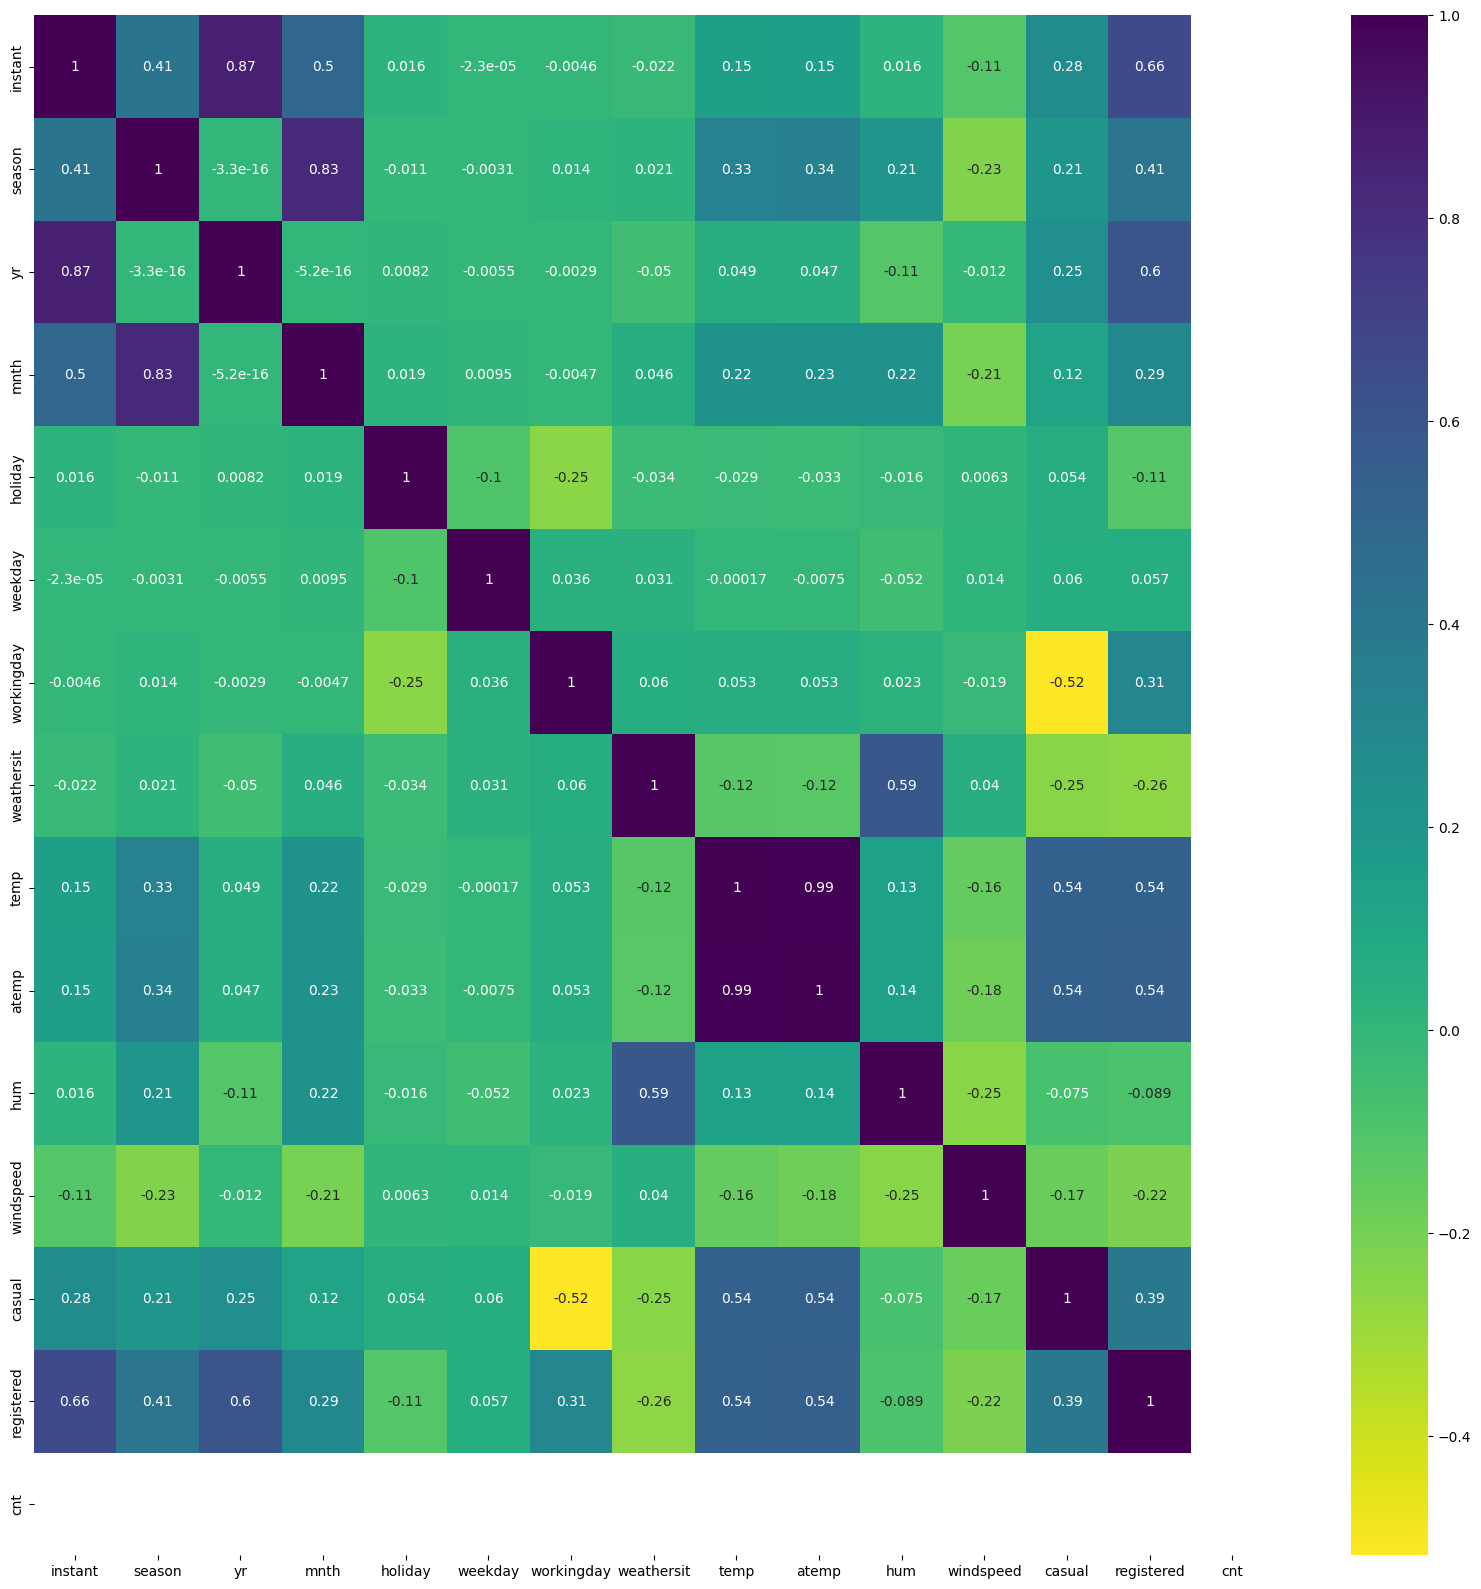

In [742]:
rentals_bike['cnt'] = (rentals_bike['cnt'] == 'M').astype(int) #encode the label into 1/0
corr = rentals_bike.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis_r',annot=True)
plt.show()

In [678]:
cnt_correlation = correlation['cnt']
cnt_correlation

instant       0.629896
season        0.404584
yr            0.569728
mnth          0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
weathersit   -0.295929
temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.235132
casual        0.672123
registered    0.945411
cnt           1.000000
Name: cnt, dtype: float64

In [679]:
features = cnt_correlation[(cnt_correlation > 0.3) & (cnt_correlation < 1)].index.values.tolist()

In [680]:
features

['instant', 'season', 'yr', 'temp', 'atemp', 'casual', 'registered']

In [681]:
features.append('windspeed') 
features.append('weathersit') 

In [682]:
features

['instant',
 'season',
 'yr',
 'temp',
 'atemp',
 'casual',
 'registered',
 'windspeed',
 'weathersit']

In [683]:
del features[5:7]

In [684]:
features

['instant', 'season', 'yr', 'temp', 'atemp', 'windspeed', 'weathersit']

In [685]:
del features[0]

In [686]:
features

['season', 'yr', 'temp', 'atemp', 'windspeed', 'weathersit']

In [687]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [688]:
lr = LinearRegression() 
lr.fit(training_data[features], training_data['cnt'])
predictions = lr.predict(testing_data[features])
mse = mean_squared_error(testing_data['cnt'], predictions)
print(mse)

838431.7166123248


In [689]:
features_2 = list(training_data.columns)

In [690]:
features_2


['instant',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [691]:

features_2.remove('cnt')
features_2.remove('casual') 
features_2.remove('registered')

In [692]:
features_2

['instant',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [693]:
lr = LinearRegression() 
lr.fit(training_data[features_2], training_data['cnt'])
predictions_2 = lr.predict(testing_data[features_2])
mse_2 = mean_squared_error(testing_data['cnt'], predictions_2)
print(mse_2)

796043.9802305879


In [694]:
error_dataframe = pd.DataFrame({'Model': ['LR - Restricted features','LR - Added Features'], 
                         'Error Value' : [mse,mse_2]}) 

In [695]:
error_dataframe

,Model,Error Value
0,LR - Restricted features,838431.716612
1,LR - Added Features,796043.980231


In [696]:
from sklearn.tree import DecisionTreeRegressor

In [697]:
dec_tree = DecisionTreeRegressor() 
#we will use columns_2 as our feature set
dec_tree.fit(training_data[features_2], training_data['cnt'])
predictions_3 = dec_tree.predict(testing_data[features_2])
error = mean_squared_error(testing_data['cnt'], predictions_3)
print(error)

739959.5342465753


In [698]:
import pandas as pd

# Initialize an empty list to hold rows
rows = []

# Append a new row to the list
rows.append({'Error Value': error, 'Model': 'Decision Tree - Same columns as LR Added Features'})

# Convert the list of rows to a DataFrame
error_dataframe = pd.DataFrame(rows, columns=['Error Value', 'Model'])


In [699]:
error_dataframe

,Error Value,Model
0,739959.534247,Decision Tree - Same columns as LR Added Features


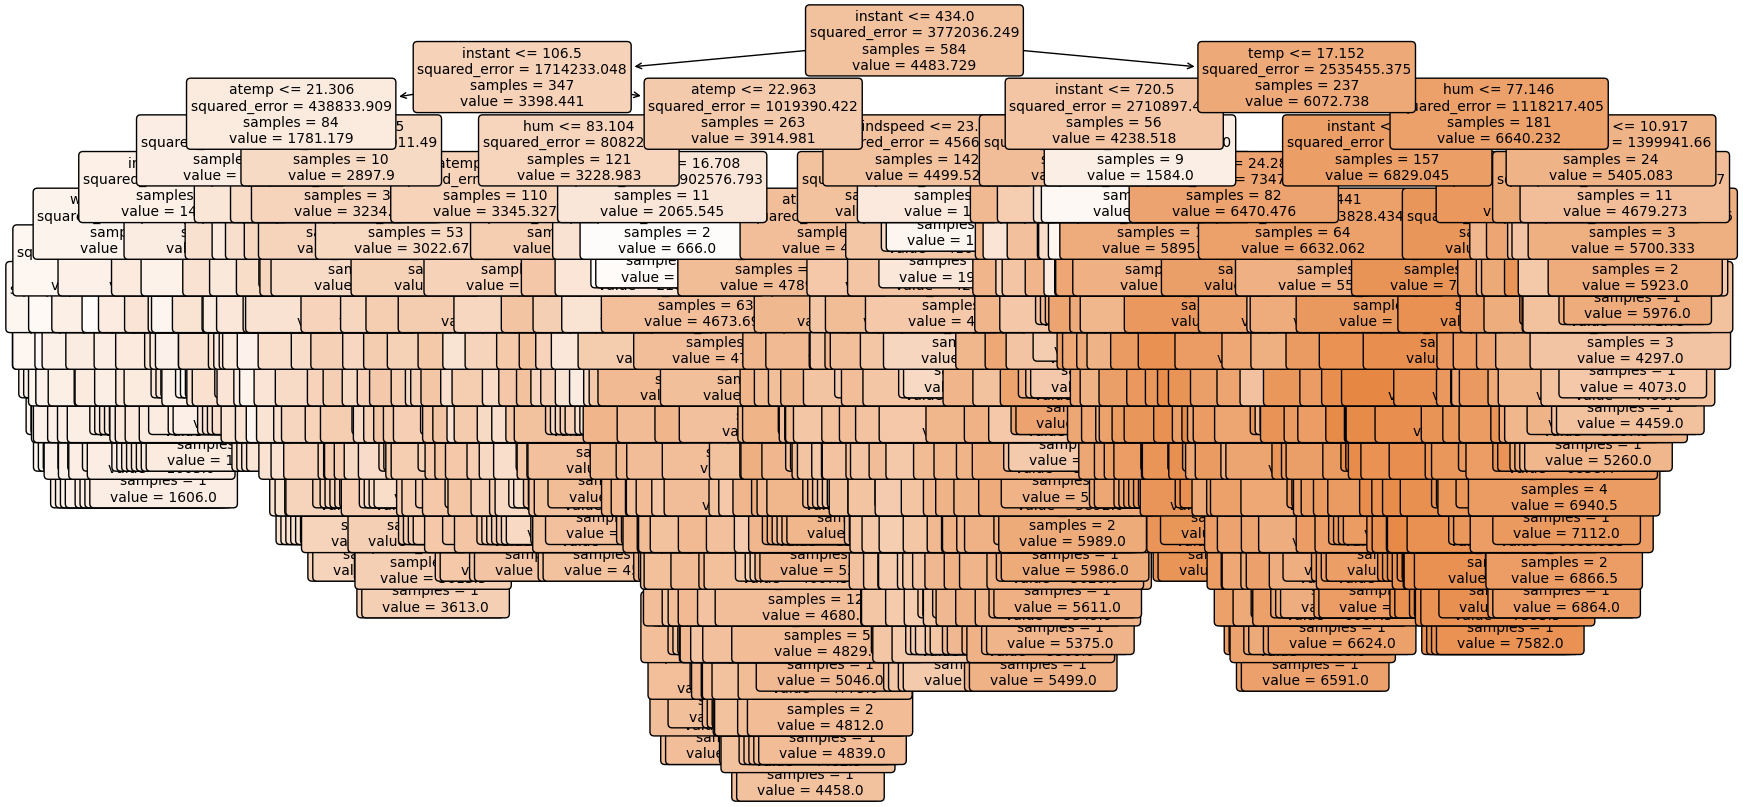

In [700]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dec_tree, feature_names=features_2, filled=True, rounded=True, fontsize=10)
plt.show()


In [701]:
deci_tree2 = DecisionTreeRegressor(min_samples_leaf = 5)
deci_tree2.fit(training_data[features_2], training_data['cnt'])
predictions_4 = deci_tree2.predict(testing_data[features_2])
error_2 = mean_squared_error(testing_data['cnt'], predictions_4)
print(error_2)


721326.5522807527


In [702]:
import pandas as pd

# Define the new row as a dictionary
new_row = {'Error Value': error_2, 'Model': 'Decision Tree - SF, Min Sample Leaf - 5'}

# Create a DataFrame with the new row
new_df = pd.DataFrame([new_row])

# Concatenate the new DataFrame with the existing error_df
error_dataframe = pd.concat([error_dataframe, new_df], ignore_index=True)


In [703]:
error_dataframe

,Error Value,Model
0,739959.534247,Decision Tree - Same columns as LR Added Features
1,721326.552281,"Decision Tree - SF, Min Sample Leaf - 5"


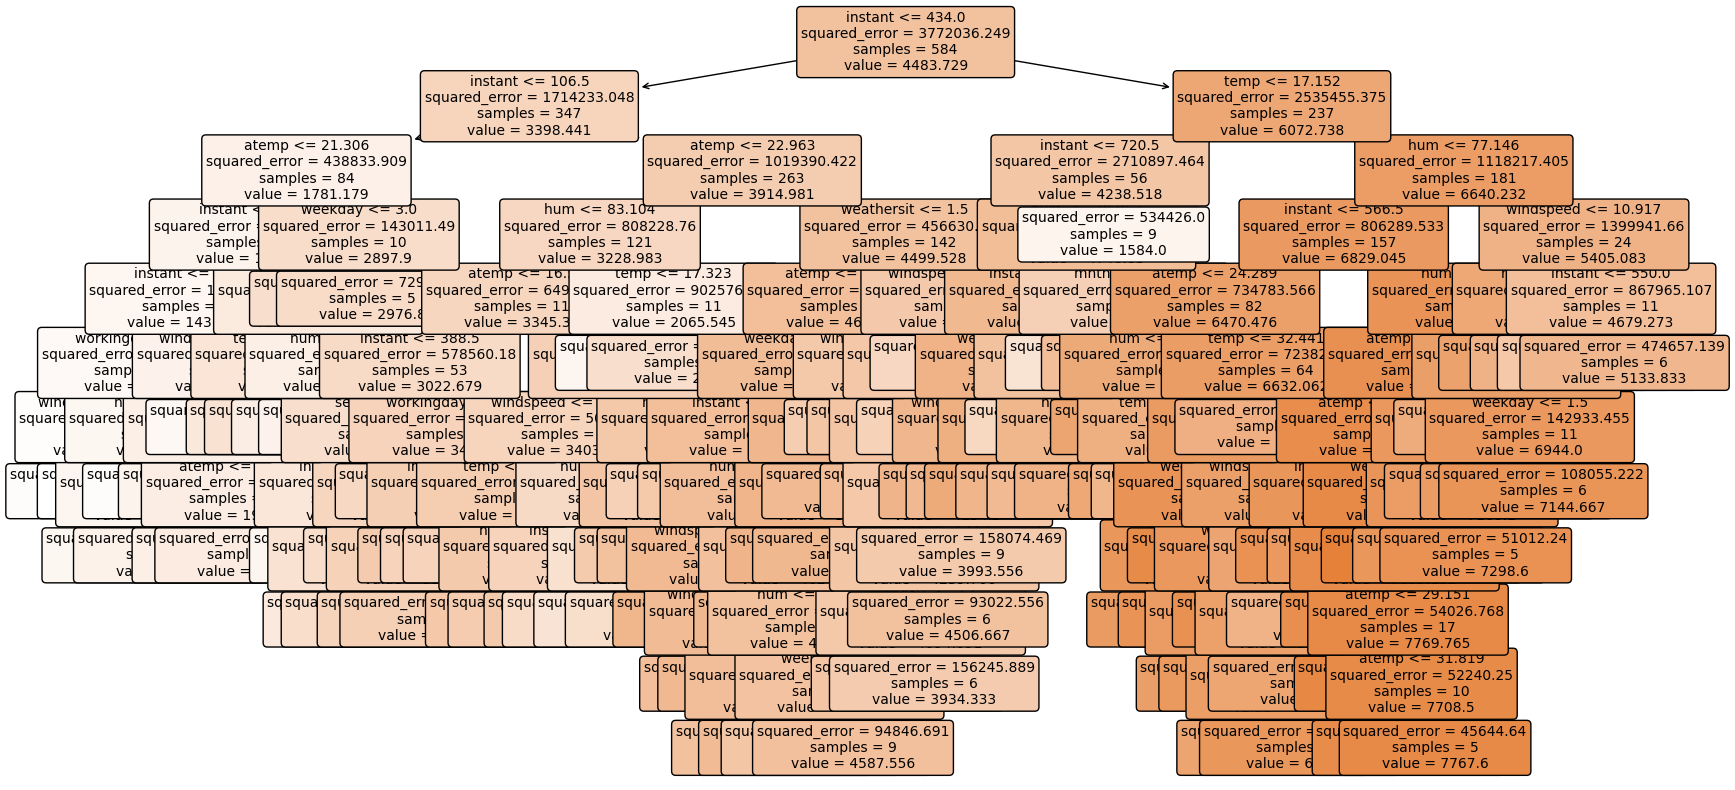

In [704]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(deci_tree2, feature_names=features_2, filled=True, rounded=True, fontsize=10)
plt.show()

In [705]:
from sklearn.ensemble import RandomForestRegressor

In [706]:
deci_tree3 = RandomForestRegressor(min_samples_leaf = 5)
deci_tree3.fit(training_data[features_2], training_data['cnt'])
predictions_5 = deci_tree3.predict(testing_data[features_2])
error_3 = mean_squared_error(testing_data['cnt'], predictions_5)
print(error_3)

488865.7618711303


In [707]:
# Assign values directly using loc
error_dataframe.loc[len(error_dataframe)] = {'Error Value': error_3, 'Model': 'Random Forest - SF Min Sample Leaf - 5'}


In [708]:
error_dataframe

,Error Value,Model
0,739959.534247,Decision Tree - Same columns as LR Added Features
1,721326.552281,"Decision Tree - SF, Min Sample Leaf - 5"
2,488865.761871,Random Forest - SF Min Sample Leaf - 5


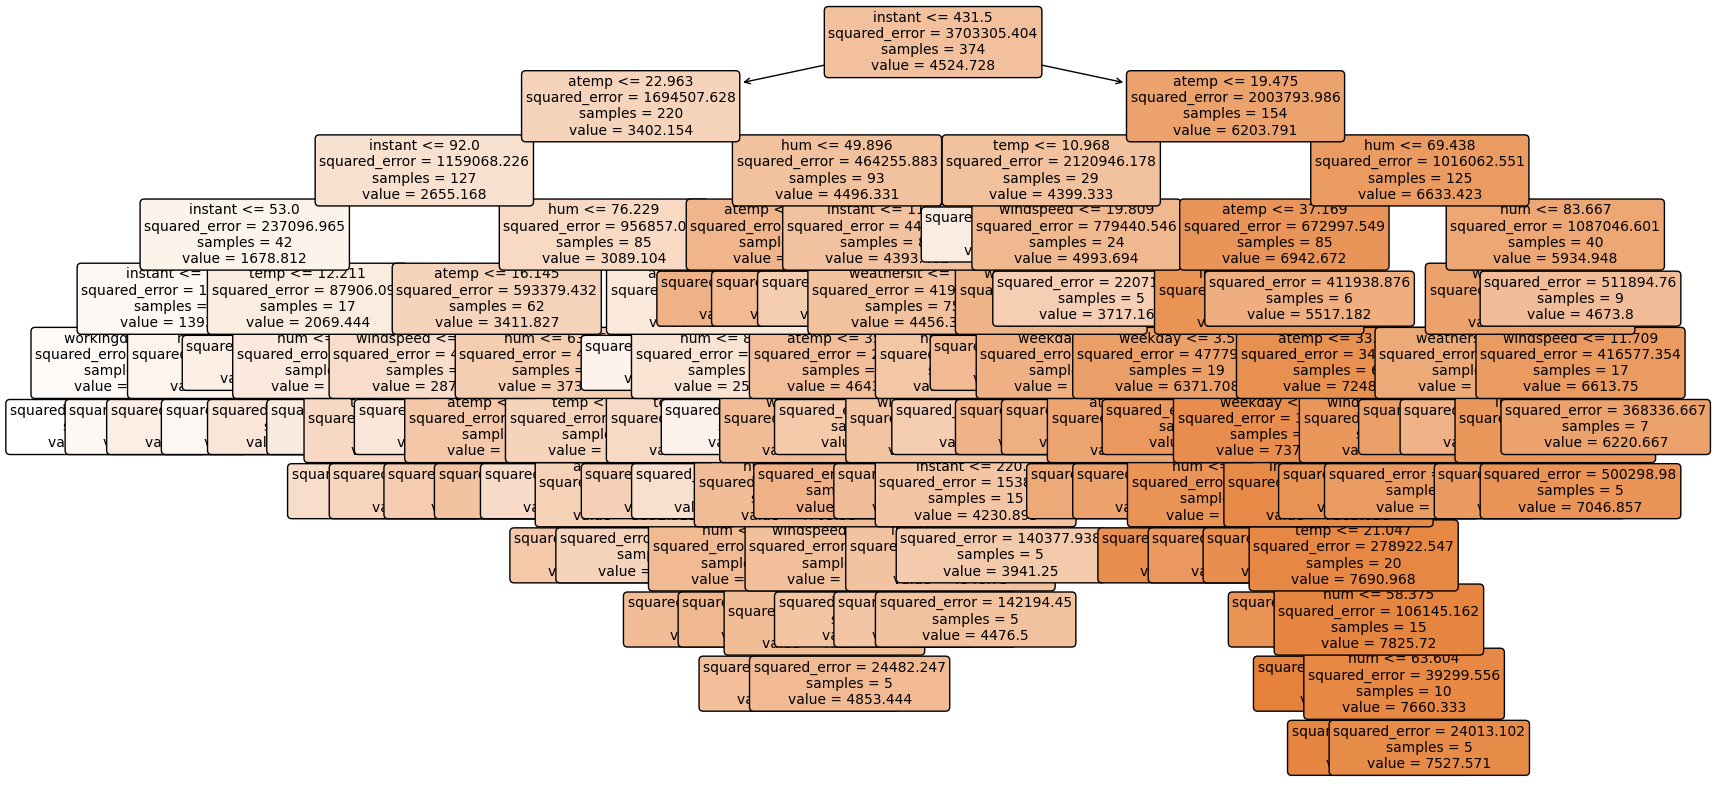

In [709]:
from sklearn.tree import plot_tree

# Visualize one of the decision trees from the random forest
plt.figure(figsize=(20,10))
plot_tree(deci_tree3.estimators_[0], feature_names=features_2, filled=True, rounded=True, fontsize=10)
plt.show()

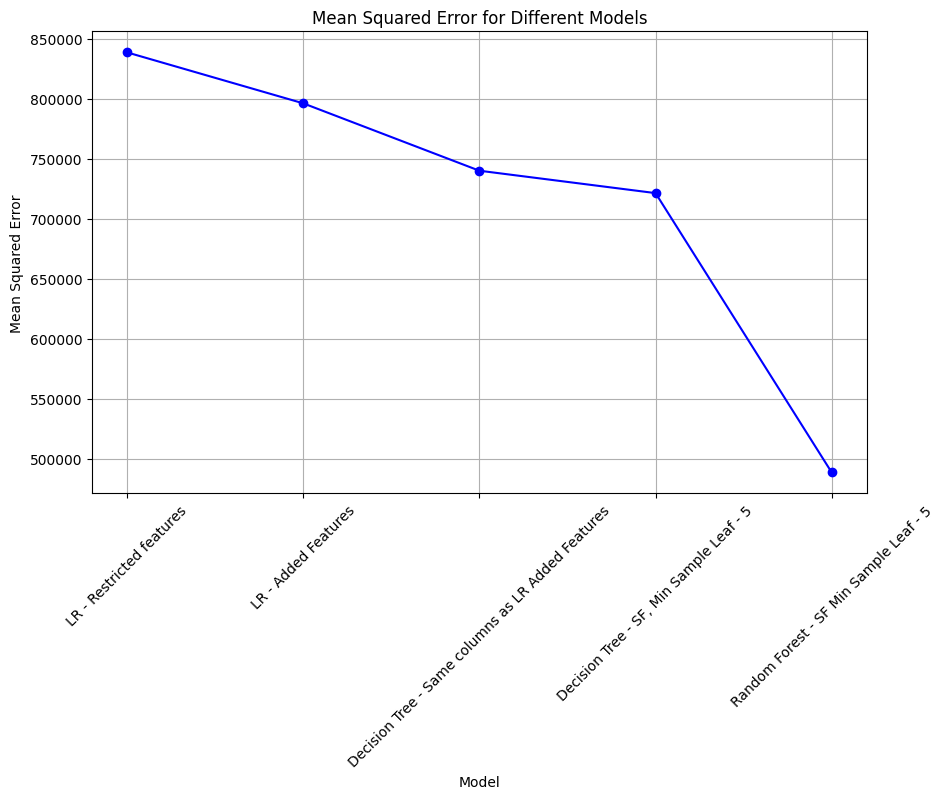

In [710]:
import matplotlib.pyplot as plt

# Define the models and their corresponding MSE values
models = ['LR - Restricted features', 'LR - Added Features', 'Decision Tree - Same columns as LR Added Features',
          'Decision Tree - SF, Min Sample Leaf - 5', 'Random Forest - SF Min Sample Leaf - 5']
mse_values = [mse, mse_2, error, error_2, error_3]

# Plot the error curves
plt.figure(figsize=(10, 6))
plt.plot(models, mse_values, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [711]:
from sklearn.metrics import r2_score

# Calculate R-squared for Linear Regression model with selected features
lr_r2 = r2_score(testing_data['cnt'], predictions)
print("R-squared for Linear Regression (Selected Features):", lr_r2)

# Calculate R-squared for Linear Regression model with different features
lr_r2_2 = r2_score(testing_data['cnt'], predictions_2)
print("R-squared for Linear Regression (Different Features):", lr_r2_2)

# Calculate R-squared for Decision Tree Regression with same features as LR (Different Features)
dt_r2 = r2_score(testing_data['cnt'], predictions_3)
print("R-squared for Decision Tree (Same features as LR - Different Features):", dt_r2)

# Calculate R-squared for Decision Tree Regression with min_samples_leaf = 5
dt_r2_2 = r2_score(testing_data['cnt'], predictions_4)
print("R-squared for Decision Tree (min_samples_leaf = 5):", dt_r2_2)

# Calculate R-squared for Random Forest Regression with min_samples_leaf = 5
rf_r2 = r2_score(testing_data['cnt'], predictions_5)
print("R-squared for Random Forest (min_samples_leaf = 5):", rf_r2)


R-squared for Linear Regression (Selected Features): 0.768075126511464
R-squared for Linear Regression (Different Features): 0.7798003155793596
R-squared for Decision Tree (Same features as LR - Different Features): 0.7953142540215656
R-squared for Decision Tree (min_samples_leaf = 5): 0.8004684626464473
R-squared for Random Forest (min_samples_leaf = 5): 0.8647711820433631


In [712]:
# Define a threshold
threshold = 50  # Adjust as needed

# Calculate accuracy-like metric
def calculate_accuracy(predictions, true_values, threshold):
    correct_predictions = 0
    total_predictions = len(predictions)
    for pred, true in zip(predictions, true_values):
        if abs(pred - true) <= threshold:
            correct_predictions += 1
    return correct_predictions / total_predictions

# Calculate accuracy-like metric for each model
lr_accuracy = calculate_accuracy(predictions, testing_data['cnt'], threshold)
print("Accuracy-like metric for Linear Regression:", lr_accuracy)

lr_accuracy_2 = calculate_accuracy(predictions_2, testing_data['cnt'], threshold)
print("Accuracy-like metric for Linear Regression (Different Features):", lr_accuracy_2)

dt_accuracy = calculate_accuracy(predictions_3, testing_data['cnt'], threshold)
print("Accuracy-like metric for Decision Tree:", dt_accuracy)

dt_accuracy_2 = calculate_accuracy(predictions_4, testing_data['cnt'], threshold)
print("Accuracy-like metric for Decision Tree (min_samples_leaf = 5):", dt_accuracy_2)

rf_accuracy = calculate_accuracy(predictions_5, testing_data['cnt'], threshold)
print("Accuracy-like metric for Random Forest (min_samples_leaf = 5):", rf_accuracy)


Accuracy-like metric for Linear Regression: 0.03424657534246575
Accuracy-like metric for Linear Regression (Different Features): 0.0410958904109589
Accuracy-like metric for Decision Tree: 0.06164383561643835
Accuracy-like metric for Decision Tree (min_samples_leaf = 5): 0.0821917808219178
Accuracy-like metric for Random Forest (min_samples_leaf = 5): 0.08904109589041095


In [744]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Feature Engineering
poly_features = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()

# Model Selection and Hyperparameter Tuning
rf_regressor = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5)

# Constructing the pipeline
pipeline = Pipeline([
    ('poly_features', poly_features),
    ('scaler', scaler),
    ('grid_search', grid_search)
])

# Fit the pipeline on training data
pipeline.fit(train_data[columns_2], train_data['cnt'])

# Make predictions on test data
predictions = pipeline.predict(test_data[columns_2])

# Calculate R-squared
r2 = r2_score(test_data['cnt'], predictions)
print("Improved R-squared:", r2)


Improved R-squared: 0.868947530810797
